In [56]:
# from DrawSolution import draw_pallet
# from class_item import Item
# import copy
# from matplotlib import pyplot as plt
# from matplotlib import patches

# eps = 1

# poligon1 = [[0,1,0], [1,1,1], [0,1,0]]
# poligon2 = [[1,1], [1,0]]
# poligon3 = [[1,1,1], [0,1,0]]

# points_1 = [[0,3], [2,0], [3,1], [2,1], [1, 4]]
# points_2 = [[0,0], [1,0], [1,8], [0,8]]
# points_3 = [[0,3], [2,0], [2,1], [3,2], [1, 4]]

# poligon_matrix = [[1,1,1,1], [1,1,1,1], [1,1,1,1]]
# short_poligon_matrix = [[1,1,1,1,1,1,1,1]]

# poligons = [copy.deepcopy(points_2), copy.deepcopy(points_2), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1), copy.deepcopy(points_1)]

# # poligons = [copy.deepcopy(points_2),copy.deepcopy(points_2)]
# items = [Item(i, poligons[i]) for i in range(len(poligons))]



# items[0].matrix = short_poligon_matrix
# items[1].matrix = short_poligon_matrix




# for item in items:
#     if item.matrix is None:
#         item.matrix = poligon_matrix

# pallet_width = 7
# pallet_height = 8



# matrix = [[0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0],
#           [0,0,0,0,0,0,0,0]]

In [57]:
def print_matrix(matrix):
    for i in range(len(matrix)):
        print(matrix[i])
        print('\n')

In [58]:
from DrawSolution import draw_pallet
from class_item import Item
import copy
from matplotlib import pyplot as plt
from matplotlib import patches
import generate 
import pallet

eps = 0.5
pallet_width = 10
pallet_leight = 10
numPoligons = 5


g= generate.Generator(pallet_width, pallet_leight, numPoligons  )
g.start(eps)
items = g.data

pal = pallet.Pallet(0, pallet_width, pallet_leight, eps)

# print_matrix(items[0].matrix)
# items[0].rotation90_item_matrix()
# print_matrix(items[0].matrix)



In [59]:
# print(items[0].id)
# locSearch(matrix, items, eps)



In [60]:
def draw_pallet(items, pallet_width, pallet_height):
    # fig, ax = plt.subplots(figsize=(pallet_height, pallet_height))
    fig, ax = plt.subplots()
    pallet = patches.Rectangle((0, 0), pallet_width, pallet_height, linewidth=2, facecolor='none', edgecolor='blue')
    ax.add_patch(pallet)
    ax.set_xlim(-1, pallet_width + 1)
    ax.set_ylim(-1, pallet_height + 1)
    for item in items:
        for point in item.points:
            point[0] += item.lb_x
            point[1] += item.lb_y
        polygon = patches.Polygon(item.points)
        ax.add_patch(polygon)
    return fig, ax

In [61]:
def fit_item(pallet, item):
    # print(item.matrix)
    for i in range(len(pallet[0])):
        for j in range(len(pallet)):
            exit = False
            # условия, что объект влезает
            if len(item.matrix) + i <= len(pallet) and len(item.matrix[0]) + j <= len(pallet[0]):
                # располагаем объект
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        # решаем есть ли пересечение
                        if pallet[i+p][j+k] + item.matrix[p][k] == 2:
                            exit = True
                            break
                    if exit:
                        break
            else:
                exit = True
            # если пересечений нет и элемент влезает, то добавляем его
            if not exit:
                item.lb_x = i
                item.lb_y = j
                for p in range(len(item.matrix)):
                    for k in range(len(item.matrix[0])):
                        pallet[i+p][j+k] += item.matrix[p][k]
                break
        if not exit:
            break

    return pallet, exit

In [62]:
# def fit_item(pallet, item):
#     # print(item.matrix)

#     for r in range(4):
#         exit = False
#         for i in range(len(pallet[0])):
#             for j in range(len(pallet)):
#                 # условия, что объект влезает
#                 if len(item.matrix) + i <= len(pallet) and len(item.matrix[0]) + j <= len(pallet[0]):
#                     # располагаем объект
#                     for p in range(len(item.matrix)):
#                         for k in range(len(item.matrix[0])):
#                             # решаем есть ли пересечение
#                             if pallet[i+p][j+k] + item.matrix[p][k] == 2:
#                                 exit = True
#                                 break
#                         if exit:
#                             break
#                 else:
#                     exit = True
#                 # если пересечений нет и элемент влезает, то добавляем его
#                 if not exit:
#                     item.lb_x = i
#                     item.lb_y = j
#                     item.rotation = 90*r
#                     for p in range(len(item.matrix)):
#                         for k in range(len(item.matrix[0])):
#                             pallet[i+p][j+k] += item.matrix[p][k]
#                     break
#             if not exit:
#                 break
#         if not exit:
#             break

#         item.rotation90_item_matrix()
        

      
#     item.set_matrix(eps)

#     return pallet, exit

In [63]:
def find_lb_coordinates(items, eps):
    for item in items:
        item.lb_x = item.lb_x * eps
        item.lb_y = item.lb_y * eps
    return items

In [64]:
def fit_pallets(matrix, items, eps):
    pallets = []
    pallets.append(copy.deepcopy(matrix))
    for item in items:
        i=0
        exit = True
        while exit and i<len(pallets):
            pallets[i], exit = fit_item(pallets[i], item)
            if exit and i==(len(pallets)-1):
                pallets.append(copy.deepcopy(matrix))
            if not exit:
                item.pallet_number = i
                # print(i)
            i+=1
    find_lb_coordinates(items, eps)

    return pallets

In [65]:
def understand_pallets(items):
    packing = []
    usedNumPallet = max([item.pallet_number for item in items])

    for i in range(usedNumPallet  + 1):
        # print(i)
        packing.append([])

    for i in range(usedNumPallet  + 1):
        for item in items:
            if item.pallet_number > len(packing):
                    packing.append([])
            if item.pallet_number == i:
                packing[i].append(item)

    return packing


def draw_all_pallets(packing):
    # print(len(packing))
    for i in range(len(packing)):
        # print(i)
        draw_pallet(packing[i], pallet_width, pallet_leight)

In [66]:
# import rastr_method
# import copy


def swap(list, pos1, pos2):

    list[pos1], list[pos2] = list[pos2], list[pos1]
    return list


#  алгоритм локального поиска
def locSearch(matrix, poligons, eps):

    n = len( poligons)

    objVal = len(fit_pallets(matrix,  poligons, eps))

    poligonsBest = copy.deepcopy(poligons)

    betterNeighboor = (0,0)
    stop = False
    while not stop:
        
        stop = True
        for i in range(n):
            for j in range(i + 1, n):
                # надо сделать, что бы два раза не проходила
                pal = fit_pallets(matrix, swap(copy.deepcopy(poligonsBest), i, j), eps)
                # print(items[0].pallet_number)
                # val = len(fit_pallets(matrix, swap(copy.deepcopy(poligons), i, j), eps))
                val = len(pal)
                if val < objVal:
                    stop = False
                    objVal = val
                    betterNeighboor = (i,j)
                    fit_pallets(matrix, swap(poligonsBest, i, j), eps)
                # draw_all_pallets(understand_pallets(poligonsBest))
                if betterNeighboor[1] != 0:
                    swap( poligonsBest, betterNeighboor[0], betterNeighboor[1])


    draw_all_pallets(understand_pallets(poligonsBest))

    return val

In [67]:
# fit_pallets(matrix, items, eps)


0
0
1
0
2
1
3
1
4
0


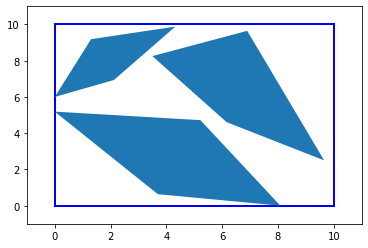

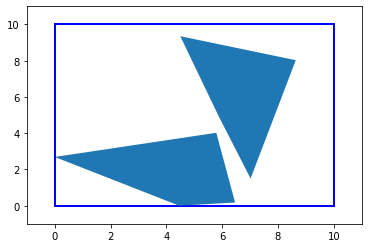

In [68]:
locSearch(pal.matrix, items, eps)

# print()
for item in items:
    print(item.id)
    print(item.pallet_number)
    # print(print_matrix(item.matrix))
    # print(item.show_item())


